In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# sns.set()
# import scipy.stats as stats

In [2]:
df_customer = pd.read_csv('customer.csv')
# df_click_stream = pd.read_csv('click_stream.csv')
df_product = pd.read_csv('product.csv', on_bad_lines='skip')
df_transactions = pd.read_csv('transactions.csv')

# Inspeksi dan Cleaning Data

## Dataset Customer

In [3]:
# inspeksi dan cleaning data
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   customer_id         100000 non-null  int64  
 1   first_name          100000 non-null  object 
 2   last_name           100000 non-null  object 
 3   username            100000 non-null  object 
 4   email               100000 non-null  object 
 5   gender              100000 non-null  object 
 6   birthdate           100000 non-null  object 
 7   device_type         100000 non-null  object 
 8   device_id           100000 non-null  object 
 9   device_version      100000 non-null  object 
 10  home_location_lat   100000 non-null  float64
 11  home_location_long  100000 non-null  float64
 12  home_location       100000 non-null  object 
 13  home_country        100000 non-null  object 
 14  first_join_date     100000 non-null  object 
dtypes: float64(2), int64(1), object(12)

In [4]:
df_customer.shape

(100000, 15)

In [5]:
df_customer.head()

,customer_id,first_name,last_name,username,email,gender,birthdate,device_type,device_id,device_version,home_location_lat,home_location_long,home_location,home_country,first_join_date
0,2870,Lala,Maryati,671a0865-ac4e-4dc4-9c4f-c286a1176f7e,671a0865_ac4e_4dc4_9c4f_c286a1176f7e@startupca...,F,1996-06-14,iOS,c9c0de76-0a6c-4ac2-843f-65264ab9fe63,iPhone; CPU iPhone OS 14_2_1 like Mac OS X,-1.043345,101.360523,Sumatera Barat,Indonesia,2019-07-21
1,8193,Maimunah,Laksmiwati,83be2ba7-8133-48a4-bbcb-b46a2762473f,83be2ba7_8133_48a4_bbcb_b46a2762473f@zakyfound...,F,1993-08-16,Android,fb331c3d-f42e-40fe-afe2-b4b73a8a6e25,Android 2.2.1,-6.212489,106.818850,Jakarta Raya,Indonesia,2017-07-16
2,7279,Bakiman,Simanjuntak,3250e5a3-1d23-4675-a647-3281879d42be,3250e5a3_1d23_4675_a647_3281879d42be@startupca...,M,1989-01-23,iOS,d13dde0a-6ae1-43c3-83a7-11bbb922730b,iPad; CPU iPad OS 4_2_1 like Mac OS X,-8.631607,116.428436,Nusa Tenggara Barat,Indonesia,2020-08-23
3,88813,Cahyadi,Maheswara,df797edf-b465-4a80-973b-9fbb612260c2,df797edf_b465_4a80_973b_9fbb612260c2@zakyfound...,M,1991-01-05,iOS,f4c18515-c5be-419f-8142-f037be47c9cd,iPad; CPU iPad OS 14_2 like Mac OS X,1.299332,115.774934,Kalimantan Timur,Indonesia,2021-10-03
4,82542,Irnanto,Wijaya,36ab08e1-03de-42a8-9e3b-59528c798824,36ab08e1_03de_42a8_9e3b_59528c798824@startupca...,M,2000-07-15,iOS,e46e4c36-4630-4736-8fcf-663db29ca3b0,iPhone; CPU iPhone OS 10_3_3 like Mac OS X,-2.980807,114.924675,Kalimantan Selatan,Indonesia,2021-04-11


In [6]:
df_customer.sample(10)

,customer_id,first_name,last_name,username,email,gender,birthdate,device_type,device_id,device_version,home_location_lat,home_location_long,home_location,home_country,first_join_date
41075,93311,Maimunah,Hastuti,4f9799da-7461-4a94-9556-ffa87a0a4297,4f9799da_7461_4a94_9556_ffa87a0a4297@startupca...,F,1995-07-09,Android,6b7dffac-7774-4a8c-820b-9acca6c6c0f6,Android 4.3,-7.833536,110.160074,Yogyakarta,Indonesia,2022-03-19
17034,18148,Puput,Agustina,0c81b847-b100-46e2-9711-2361f75fb50c,0c81b847_b100_46e2_9711_2361f75fb50c@startupca...,F,1990-10-08,iOS,21822bdc-599d-4bde-bb1b-fc0bd9feff37,iPhone; CPU iPhone OS 9_3_6 like Mac OS X,-7.371290,107.684419,Jawa Barat,Indonesia,2022-02-05
2131,54732,Olivia,Yuliarti,253e6c3e-ecee-45c6-b50c-ae6243bda559,253e6c3e_ecee_45c6_b50c_ae6243bda559@startupca...,F,1988-04-17,iOS,ef0d3968-7927-47bc-8077-4cc09418562d,iPhone; CPU iPhone OS 6_1_6 like Mac OS X,-3.657006,120.157993,Sulawesi Selatan,Indonesia,2018-10-07
26898,4939,Paulin,Winarsih,f170cbdb-650a-4da0-a10d-4a7e44c226f2,f170cbdb_650a_4da0_a10d_4a7e44c226f2@zakyfound...,F,2002-03-23,iOS,21a5a617-7532-4c6d-ad70-065eb0bb22eb,iPad; CPU iPad OS 7_1_2 like Mac OS X,-6.252066,106.801453,Jakarta Raya,Indonesia,2018-11-04
10850,61980,Nadia,Rahmawati,82239ddf-1296-4bc6-b0b1-9e5ccac3d016,82239ddf_1296_4bc6_b0b1_9e5ccac3d016@startupca...,F,1998-08-20,Android,b9db8e25-0234-4dee-9485-50fa0a0b3e09,Android 6.0,-6.225242,106.750018,Jakarta Raya,Indonesia,2019-07-27
23628,8904,Maman,Firgantoro,6acfeda8-9fe9-4656-a7b2-77d5544d84ea,6acfeda8_9fe9_4656_a7b2_77d5544d84ea@zakyfound...,M,1999-12-15,Android,45c6ba39-cef9-46e1-8775-203b6f2748dc,Android 8.0.0,0.801899,123.858392,Sulawesi Utara,Indonesia,2020-07-26
76430,91162,Vera,Hasanah,8d22c492-4d7e-42a6-97ca-eb140333bc3d,8d22c492_4d7e_42a6_97ca_eb140333bc3d@startupca...,F,1994-11-15,Android,bb8a0554-62f9-4811-ad71-49b322bcda89,Android 4.0.4,0.035018,99.818694,Sumatera Barat,Indonesia,2022-03-06
6087,82057,Wirda,Usamah,a422a09e-e301-4319-a442-12494da7c860,a422a09e_e301_4319_a442_12494da7c860@startupca...,F,2003-03-12,Android,4741761f-d503-4e93-9cfd-945294545e87,Android 5.1,-6.368529,107.646860,Jawa Barat,Indonesia,2021-08-18
67244,15638,Karya,Saputra,b21c1845-902c-436a-b52b-6a25d43c4e5e,b21c1845_902c_436a_b52b_6a25d43c4e5e@startupca...,M,1981-07-31,Android,0614436a-85f4-427d-81f2-5778076ec8df,Android 3.1,0.381606,113.463230,Kalimantan Barat,Indonesia,2022-05-08
53808,55094,Laksana,Samosir,09c6750f-501e-44c4-93ae-f3604255db40,09c6750f_501e_44c4_93ae_f3604255db40@startupca...,M,1990-03-11,iOS,9e0ce034-6f68-4715-899c-e1b297f650ea,iPhone; CPU iPhone OS 14_2 like Mac OS X,-7.676565,111.297533,Jawa Timur,Indonesia,2022-01-31


In [7]:
df_customer.duplicated().sum()

0

In [8]:
df_customer.isna().sum()

customer_id           0
first_name            0
last_name             0
username              0
email                 0
gender                0
birthdate             0
device_type           0
device_id             0
device_version        0
home_location_lat     0
home_location_long    0
home_location         0
home_country          0
first_join_date       0
dtype: int64

In [9]:
#mengubah tipe data yang tidak sesuai
df_customer['birthdate'] = pd.to_datetime(df_customer['birthdate'])
df_customer['first_join_date'] = pd.to_datetime(df_customer['first_join_date'])

In [10]:
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   customer_id         100000 non-null  int64         
 1   first_name          100000 non-null  object        
 2   last_name           100000 non-null  object        
 3   username            100000 non-null  object        
 4   email               100000 non-null  object        
 5   gender              100000 non-null  object        
 6   birthdate           100000 non-null  datetime64[ns]
 7   device_type         100000 non-null  object        
 8   device_id           100000 non-null  object        
 9   device_version      100000 non-null  object        
 10  home_location_lat   100000 non-null  float64       
 11  home_location_long  100000 non-null  float64       
 12  home_location       100000 non-null  object        
 13  home_country        100000 non

In [11]:
df_customer.describe()

,customer_id,home_location_lat,home_location_long
count,100000.000000,100000.000000,100000.000000
mean,50000.500000,-5.106390,110.936081
std,28867.657797,3.088183,6.343363
min,1.000000,-10.845002,95.275319
25%,25000.750000,-7.372650,106.860628
50%,50000.500000,-6.240087,110.162010
75%,75000.250000,-3.092254,113.171187
max,100000.000000,5.818355,140.993119


In [12]:
df_customer.describe(include="O")

,first_name,last_name,username,email,gender,device_type,device_id,device_version,home_location,home_country
count,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000
unique,707,173,100000,100000,2,2,100000,86,33,1
top,Rahmi,Susanti,671a0865-ac4e-4dc4-9c4f-c286a1176f7e,671a0865_ac4e_4dc4_9c4f_c286a1176f7e@startupca...,F,Android,c9c0de76-0a6c-4ac2-843f-65264ab9fe63,Android 2.2.2,Jakarta Raya,Indonesia
freq,560,1028,1,1,64230,76637,1,1296,18715,100000


In [13]:
print(df_customer.birthdate.min())
print(df_customer.birthdate.max())

1954-06-30 00:00:00
2016-07-27 00:00:00


In [14]:
df_customer.birthdate.sort_values(ascending=False).head(20)

18437   2016-07-27
95661   2016-02-19
93456   2016-01-29
17262   2016-01-15
35826   2015-10-13
37890   2015-07-19
29371   2015-06-28
70817   2015-06-14
62773   2015-04-07
16333   2015-03-14
16615   2015-03-09
2310    2015-02-11
1403    2015-01-29
90829   2014-12-22
47834   2014-12-20
97162   2014-10-09
32420   2014-10-06
51839   2014-09-02
69462   2014-08-25
74399   2014-07-13
Name: birthdate, dtype: datetime64[ns]

In [15]:
df_customer.birthdate.sort_values(ascending=True).head(20)

76383   1954-06-30
97940   1955-01-01
51075   1955-02-14
76788   1955-05-04
76539   1955-06-01
52243   1957-01-02
13873   1957-01-04
15502   1958-08-19
59294   1959-02-28
27158   1960-10-31
13360   1960-11-20
83810   1960-11-29
47851   1961-04-03
77032   1961-07-20
40452   1961-09-06
17233   1962-04-21
14661   1962-06-26
56343   1962-07-11
58820   1962-07-29
85063   1962-07-29
Name: birthdate, dtype: datetime64[ns]

In [16]:
print(df_customer.first_join_date.min())
print(df_customer.first_join_date.max())

2016-06-30 00:00:00
2022-07-31 00:00:00


In [17]:
df_customer.first_join_date.sort_values(ascending=False).head(20)

81493   2022-07-31
53302   2022-07-31
6797    2022-07-31
16385   2022-07-31
1110    2022-07-31
13622   2022-07-31
27279   2022-07-31
49564   2022-07-31
57854   2022-07-31
27322   2022-07-31
91303   2022-07-31
56114   2022-07-31
27330   2022-07-31
5198    2022-07-31
82320   2022-07-31
37041   2022-07-31
85429   2022-07-31
49471   2022-07-31
14594   2022-07-31
16552   2022-07-31
Name: first_join_date, dtype: datetime64[ns]

In [18]:
df_customer.first_join_date.sort_values(ascending=True).head(20)

77238   2016-06-30
42782   2016-06-30
76057   2016-06-30
73575   2016-06-30
88919   2016-06-30
78050   2016-06-30
86170   2016-07-01
44347   2016-07-01
5767    2016-07-01
36203   2016-07-01
5708    2016-07-01
73421   2016-07-01
62964   2016-07-01
33957   2016-07-01
9576    2016-07-01
35809   2016-07-01
93141   2016-07-02
55931   2016-07-02
74017   2016-07-02
52067   2016-07-02
Name: first_join_date, dtype: datetime64[ns]

In [19]:
print(df_customer.email.str.contains(pat="@").sum())
print(df_customer.email.str.contains(pat="@zakyfoundation").sum())
print(df_customer.email.str.contains(pat="@startupcampus").sum())

100000
35906
64094


In [20]:
print(df_customer.email.apply(len).min())
print(df_customer.email.apply(len).max())

53
55


In [21]:
#mengecek apakah ada outlier pada home_location
df_customer.home_location.unique()

array(['Sumatera Barat', 'Jakarta Raya', 'Nusa Tenggara Barat',
       'Kalimantan Timur', 'Kalimantan Selatan', 'Kepulauan Riau',
       'Bengkulu', 'Jawa Barat', 'Nusa Tenggara Timur', 'Yogyakarta',
       'Jawa Timur', 'Jawa Tengah', 'Sulawesi Tenggara', 'Lampung',
       'Bangka Belitung', 'Maluku', 'Sulawesi Utara', 'Sulawesi Barat',
       'Jambi', 'Kalimantan Tengah', 'Sumatera Utara', 'Kalimantan Barat',
       'Papua Barat', 'Sulawesi Selatan', 'Maluku Utara', 'Banten',
       'Bali', 'Riau', 'Sumatera Selatan', 'Aceh', 'Papua',
       'Sulawesi Tengah', 'Gorontalo'], dtype=object)

In [22]:
#mengecek apakah ada outlier pada device_type
df_customer.device_version.unique()

array(['iPhone; CPU iPhone OS 14_2_1 like Mac OS X', 'Android 2.2.1',
       'iPad; CPU iPad OS 4_2_1 like Mac OS X',
       'iPad; CPU iPad OS 14_2 like Mac OS X',
       'iPhone; CPU iPhone OS 10_3_3 like Mac OS X', 'Android 4.0.4',
       'Android 8.1.0', 'Android 4.2',
       'iPad; CPU iPad OS 10_3_3 like Mac OS X', 'Android 4.0.1',
       'Android 2.2.2', 'Android 2.3', 'Android 7.1.1', 'Android 2.3.3',
       'iPhone; CPU iPhone OS 6_1_6 like Mac OS X', 'Android 4.1.2',
       'Android 3.2.6', 'Android 11', 'Android 3.2.4', 'Android 6.0.1',
       'Android 5.1', 'Android 2.0.1', 'Android 7.1', 'Android 8.0.0',
       'iPad; CPU iPad OS 6_1_6 like Mac OS X', 'Android 3.2',
       'Android 3.2.5', 'Android 5.0.1', 'Android 3.2.3',
       'iPhone; CPU iPhone OS 9_3_6 like Mac OS X', 'Android 2.3.1',
       'Android 2.0', 'iPad; CPU iPad OS 5_1_1 like Mac OS X',
       'Android 2.3.6', 'Android 5.0.2', 'Android 3.1', 'Android 7.1.2',
       'Android 2.3.5', 'Android 4.2.2',
       '

### Interesting Discovery

* Most columns have the data type object. It appears that every column **NOT contains** empty value since the Non-Null count for every column is equal with the total number of rows (100000) **nor** the data contains duplicated data.
* Dataset ini memiliki 20 kolom dan 100000 baris.
* Periode pengambilan data 2016-06-30 hingga 2022-07-31
* Customer tertua lahir pada tahun 1954 dan yang termuda lahir pada tahun 2016.
* Terdapat 4 customer yang lahir pada tahun 2016, 9 customer yang lahir pada tahun 2015.
* Sebanyak 64230 customer berjenis kelamin perempuan
* Hanya terdapat 2 tipe device, yaitu android dan IoS dengan variasi sebanyak 86 versi device. Dan sebanyak 76637 customer menggunakan Android
* Data yang tersedia dari Indonesia dengan sebaran sebanyak 33 provinsi.
* It seems that there is no outlier in this dataset, **Ready for some EDA?**

## Exploratory Data Analysis

### Apa saja device para customer?

In [23]:
dev_type = df_customer.groupby("device_type")[["customer_id"]].count()
dev_type

,customer_id
device_type,
Android,76637
iOS,23363


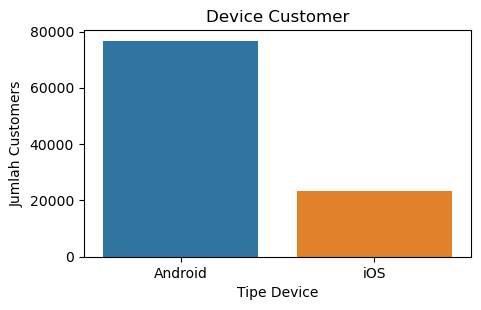

In [24]:
plt.figure(figsize=(5,3), dpi=100)
sns.barplot(x=dev_type.index, y=dev_type.customer_id)
plt.xlabel("Tipe Device")
plt.ylabel("Jumlah Customers")
plt.title("Device Customer");

**Insight**

Sebanyak 76637 customer menggunakan Android dan 23363 menggunakan iOS

### Bagaimana distribusi customer berdasarkan gender?

In [25]:
gender_dist = df_customer.groupby("gender")[["customer_id"]].count()
gender_dist

,customer_id
gender,
F,64230
M,35770


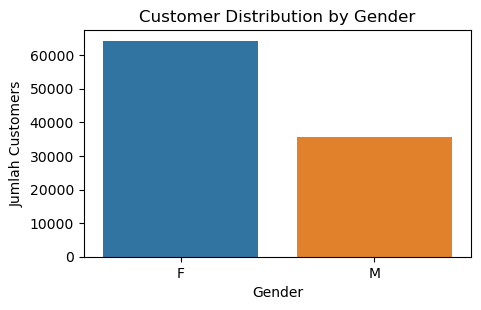

In [26]:
plt.figure(figsize=(5,3), dpi=100)
sns.barplot(x=gender_dist.index, y=gender_dist.customer_id)
plt.xlabel("Gender")
plt.ylabel("Jumlah Customers")
plt.title("Customer Distribution by Gender");

**Insight**

Sebanyak 64230 customer merupakan perempuan dan 35770 merupakan laki-laki

### Bagaimana distribusi customer berdasarkan tahun lahir?

In [27]:
birth_dist = df_customer.groupby(df_customer["birthdate"].dt.year)[["customer_id"]].count()
birth_dist.sort_values("customer_id", ascending=False)

,customer_id
birthdate,
1998,5653
1997,5547
1996,5455
1999,5436
1994,5355
...,...
1960,3
1957,2
1959,1


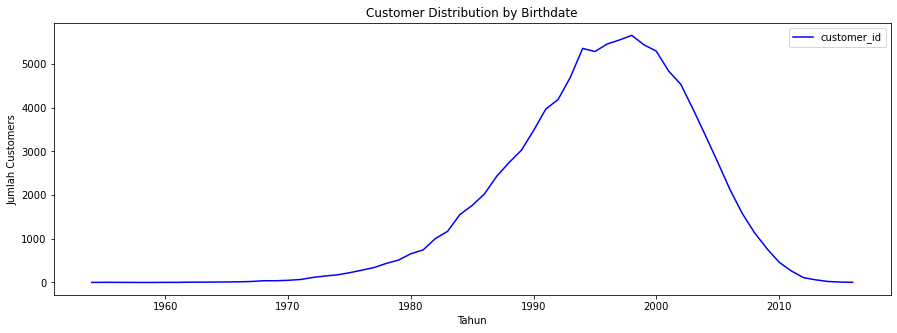

In [28]:
birth_dist.plot(kind="line", color = "blue", figsize=(15,5))
plt.xlabel("Tahun")
plt.ylabel("Jumlah Customers")
plt.title("Customer Distribution by Birthdate")
plt.show()

**Insight**

Dapat dilihat pada graph di atas bahwa kebanyakan customer lahir pada rentang waktu 1980 - 2010

### Bagaimana distribusi customer berdasarkan province?

In [29]:
prov_dist = df_customer.groupby(df_customer["home_location"])[["customer_id"]].count().sort_values("customer_id", ascending=False)
prov_dist

,customer_id
home_location,
Jakarta Raya,18715
Jawa Barat,11486
Jawa Tengah,10960
Jawa Timur,9953
Yogyakarta,7849
Kalimantan Barat,5603
Lampung,5426
Kalimantan Selatan,4229
Kalimantan Tengah,4091


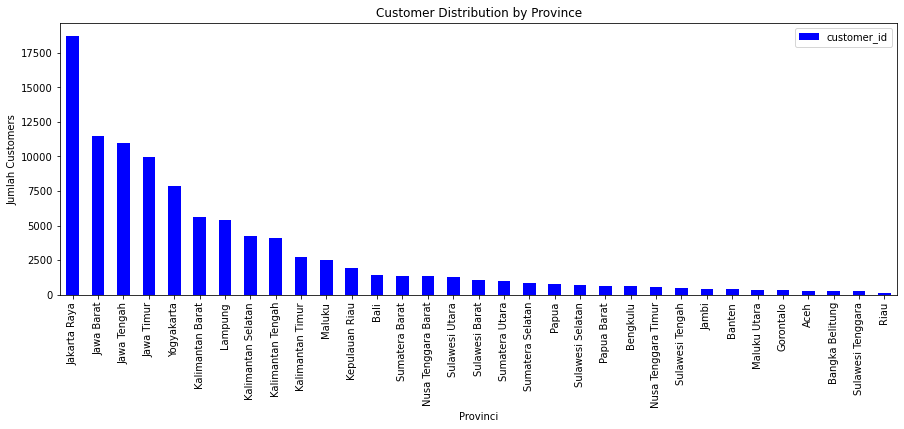

In [30]:
prov_dist.plot(kind="bar", color = "blue", figsize=(15,5))
plt.xlabel("Provinci")
plt.ylabel("Jumlah Customers")
plt.title("Customer Distribution by Province")
plt.show()

**Insight**

Dapat dilihat pada graph di atas bahwa kebanyakan customer lahir pada rentang waktu 1980 - 2010

In [31]:
# Membuat data dari Juni 2016 - Juni 2017

data_16_17 = df_customer[(df_customer['first_join_date'] >= '2016-06-30 00:00:00') & (df_customer['first_join_date'] <= '2017-06-30 23:59:59')]
data_16_17.sort_values(by='first_join_date', ascending=True)

,customer_id,first_name,last_name,username,email,gender,birthdate,device_type,device_id,device_version,home_location_lat,home_location_long,home_location,home_country,first_join_date
42782,21734,Najwa,Prastuti,5a68e225-3be4-4cb6-9667-c39c6c4b204f,5a68e225_3be4_4cb6_9667_c39c6c4b204f@startupca...,F,2005-10-26,Android,6f9cd213-5926-4255-a3b9-bf5f167c7680,Android 2.3.4,-6.172756,106.787307,Jakarta Raya,Indonesia,2016-06-30
88919,60006,Samiah,Mayasari,29465574-78b9-4105-9d99-e468270388d1,29465574_78b9_4105_9d99_e468270388d1@startupca...,F,1983-04-27,Android,cb8aea8c-a949-474e-bb08-0bf553dce079,Android 4.2.1,-6.821547,106.819542,Jawa Barat,Indonesia,2016-06-30
78050,69114,Nova,Haryanti,8e37c0f2-bb59-4108-8fe6-0d5fad92dd9f,8e37c0f2_bb59_4108_8fe6_0d5fad92dd9f@startupca...,F,1991-09-11,Android,75ef743d-83d3-4e01-8896-a3e4ae4cd72f,Android 5.0.1,-2.375138,114.319427,Kalimantan Tengah,Indonesia,2016-06-30
73575,73773,Dacin,Gunawan,b7d339e1-aa83-4bdf-b523-8b850a9455ad,b7d339e1_aa83_4bdf_b523_8b850a9455ad@startupca...,M,1991-02-20,Android,d04602f9-8fc8-405e-ac12-8bc5cce3db69,Android 4.3,-6.578046,108.145161,Jawa Barat,Indonesia,2016-06-30
76057,38119,Jumari,Mangunsong,1a78a21d-6c13-44c9-b530-e6aa89934398,1a78a21d_6c13_44c9_b530_e6aa89934398@zakyfound...,M,2000-12-25,Android,9fe1985d-fbc8-4e9e-9f72-32260607b6b2,Android 4.2.1,-4.563973,105.486289,Lampung,Indonesia,2016-06-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34459,91745,Mala,Anggraini,07626371-96cd-4a25-9b9c-545262cffc61,07626371_96cd_4a25_9b9c_545262cffc61@zakyfound...,F,1993-09-30,Android,b39e168f-49a8-41e7-80bf-36060bc332cb,Android 6.0,-6.261963,106.848124,Jakarta Raya,Indonesia,2017-06-30
72981,15669,Lili,Pertiwi,99aa7379-536c-4c5c-ad2c-5dfda890df17,99aa7379_536c_4c5c_ad2c_5dfda890df17@startupca...,F,1994-10-22,Android,3377367c-d366-4d68-a8ff-04fdd3da477f,Android 3.0,-6.767154,108.216318,Jawa Barat,Indonesia,2017-06-30
17617,44173,Julia,Kuswandari,f2e89bbe-70aa-494c-942e-d50c25ebfc84,f2e89bbe_70aa_494c_942e_d50c25ebfc84@zakyfound...,F,2001-07-22,Android,9e580f2d-6ae0-45ec-8866-870dd5f5e744,Android 2.2.3,-1.814703,103.789446,Jambi,Indonesia,2017-06-30
43181,35797,Zamira,Nuraini,6a7990cf-717e-4396-8f9a-72e37b2ebf11,6a7990cf_717e_4396_8f9a_72e37b2ebf11@zakyfound...,F,2000-01-30,Android,e4f7eb09-4a52-4801-a7bf-c635909fc6f7,Android 11,-8.130125,110.627290,Yogyakarta,Indonesia,2017-06-30


In [32]:
# Membuat data dari Juni 2017 - Juni 2018

data_17_18 = df_customer[(df_customer['first_join_date'] > '2017-06-30 00:00:00') & (df_customer['first_join_date'] <= '2018-06-30 23:59:59')]
data_17_18.sort_values(by='first_join_date', ascending=True)

,customer_id,first_name,last_name,username,email,gender,birthdate,device_type,device_id,device_version,home_location_lat,home_location_long,home_location,home_country,first_join_date
59602,74168,Eli,Rahimah,8ea00967-0fd1-4d46-aa36-74a2eb222781,8ea00967_0fd1_4d46_aa36_74a2eb222781@zakyfound...,F,2000-04-27,iOS,bcad0321-ffd9-471b-825a-0b5dada9f25e,iPhone; CPU iPhone OS 14_2 like Mac OS X,-5.404690,105.362744,Lampung,Indonesia,2017-07-01
38474,44177,Restu,Palastri,b25d7214-af6c-49ca-881d-0b81606cd256,b25d7214_af6c_49ca_881d_0b81606cd256@startupca...,F,2002-10-16,iOS,c0d72d50-ad5d-401a-9477-a3f828f6bdc7,iPad; CPU iPad OS 7_1_2 like Mac OS X,-4.294792,104.889318,Lampung,Indonesia,2017-07-01
29382,64659,Paramita,Handayani,bf647eef-27c7-43b0-9362-60307e66b86a,bf647eef_27c7_43b0_9362_60307e66b86a@startupca...,F,2004-09-11,Android,796d4997-98a5-4aa6-aa24-28f86c92ad24,Android 2.3.2,-7.335346,107.098177,Jawa Barat,Indonesia,2017-07-01
92200,64428,Ade,Riyanti,0ca9452b-5597-442c-bde0-2d481b381143,0ca9452b_5597_442c_bde0_2d481b381143@startupca...,F,2001-10-16,Android,3b156049-45a2-46cf-a04d-fe067c80a3fa,Android 5.1,-7.387087,110.426037,Jawa Tengah,Indonesia,2017-07-01
38728,95911,Rahmi,Suryatmi,ec79dc39-2e80-4c5b-867f-a7e7f3831347,ec79dc39_2e80_4c5b_867f_a7e7f3831347@startupca...,F,1995-12-14,iOS,4ab968ba-461b-4cd5-9ecd-4fa664930301,iPad; CPU iPad OS 3_1_3 like Mac OS X,-1.421444,112.019667,Kalimantan Tengah,Indonesia,2017-07-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64282,44440,Bakidin,Sitompul,62a4d797-4f94-4341-aba8-3c6d80d399fd,62a4d797_4f94_4341_aba8_3c6d80d399fd@startupca...,M,1991-05-10,Android,d618fb89-c658-4973-a5a9-05ca29c626f4,Android 2.3.7,-8.164670,112.416559,Jawa Timur,Indonesia,2018-06-30
88211,61075,Melinda,Hariyah,d002962a-734d-4e38-8587-0754ddb34443,d002962a_734d_4e38_8587_0754ddb34443@startupca...,F,2002-05-31,iOS,8a651422-23bf-48d0-9b0f-9cbab18c1ad0,iPad; CPU iPad OS 12_4_8 like Mac OS X,-5.406781,105.286830,Lampung,Indonesia,2018-06-30
64045,44683,Laras,Halimah,a690623a-4447-4043-9c85-f764b1657fe6,a690623a_4447_4043_9c85_f764b1657fe6@zakyfound...,F,1996-09-25,Android,68045d73-f38d-434b-a1cc-341c90332db2,Android 4.2.1,-2.758482,104.985290,Sumatera Selatan,Indonesia,2018-06-30
7719,13220,Jamalia,Yuniar,8acc6bad-bfa9-42d7-93b7-9b7ff7e86068,8acc6bad_bfa9_42d7_93b7_9b7ff7e86068@startupca...,F,2000-09-20,iOS,159befc1-2184-4527-8adf-2948afa1aaa5,iPad; CPU iPad OS 6_1_6 like Mac OS X,-4.945409,103.837382,Lampung,Indonesia,2018-06-30


In [33]:
# Membuat data dari Juni 2018 - Juni 2019

data_18_19 = df_customer[(df_customer['first_join_date'] > '2018-06-30 00:00:00') & (df_customer['first_join_date'] <= '2019-06-30 23:59:59')]
data_18_19.sort_values(by='first_join_date', ascending=True)

,customer_id,first_name,last_name,username,email,gender,birthdate,device_type,device_id,device_version,home_location_lat,home_location_long,home_location,home_country,first_join_date
57313,43688,Among,Haryanto,4b43a1b5-93e1-4d62-8f20-18242427e0c0,4b43a1b5_93e1_4d62_8f20_18242427e0c0@zakyfound...,M,2003-06-22,iOS,a721c170-d05b-43e4-b5bc-a5f744e94d36,iPhone; CPU iPhone OS 10_3_3 like Mac OS X,-7.110915,113.633007,Jawa Timur,Indonesia,2018-07-01
7243,54216,Belinda,Uyainah,b174d1b8-7015-4166-a034-26906a34c99c,b174d1b8_7015_4166_a034_26906a34c99c@zakyfound...,F,1996-03-15,Android,da7955bf-d6f3-4a8c-9a13-4c2ae19f6a00,Android 2.3,-7.606564,110.061884,Jawa Tengah,Indonesia,2018-07-01
74135,73801,Gasti,Safitri,a995d6fa-66da-43fe-9d9b-ad02ccd5ccbd,a995d6fa_66da_43fe_9d9b_ad02ccd5ccbd@startupca...,F,1991-03-24,iOS,2489aacb-aa33-4897-9d35-2ef1db8761b4,iPhone; CPU iPhone OS 5_1_1 like Mac OS X,-6.284278,106.828164,Jakarta Raya,Indonesia,2018-07-01
25655,97357,Melinda,Kuswandari,ab52a3a2-27dc-43da-82d2-069d7f993b9f,ab52a3a2_27dc_43da_82d2_069d7f993b9f@startupca...,F,1995-06-01,Android,0436b727-a393-4dce-9fe5-4153950b7664,Android 4.3.1,-6.108680,106.697229,Jakarta Raya,Indonesia,2018-07-01
683,15616,Ina,Yulianti,6c938303-f502-4736-9080-163327ea5a5e,6c938303_f502_4736_9080_163327ea5a5e@zakyfound...,F,2001-06-30,Android,f98b4daa-3388-4637-861c-16de5681df78,Android 3.2,-7.936859,110.605917,Yogyakarta,Indonesia,2018-07-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68350,98129,Atmaja,Manullang,225a2950-11d7-407f-a484-cdc58e7001a1,225a2950_11d7_407f_a484_cdc58e7001a1@startupca...,M,1994-03-16,Android,33708217-1991-4841-a414-01d32d34d48b,Android 11,0.730561,124.317467,Sulawesi Utara,Indonesia,2019-06-30
8155,29969,Maimunah,Usada,f274ca3a-b85c-4051-8654-3382bfbf02d7,f274ca3a_b85c_4051_8654_3382bfbf02d7@startupca...,F,1987-02-12,iOS,865b0b07-ec66-49ee-b66a-5c3b604ece08,iPhone; CPU iPhone OS 10_3_4 like Mac OS X,-6.991163,112.291504,Jawa Timur,Indonesia,2019-06-30
19393,90356,Pranata,Prayoga,cf7f8ce2-dea1-49ae-9a0e-3e8c17503601,cf7f8ce2_dea1_49ae_9a0e_3e8c17503601@zakyfound...,M,1994-08-10,Android,2ae4a455-daea-459b-aa32-61af69e66581,Android 2.1,-7.383825,106.625992,Jawa Barat,Indonesia,2019-06-30
55509,22929,Cengkir,Wahyudin,c2fdbf0c-aef7-4afc-8b93-0bf9d8ff7fd2,c2fdbf0c_aef7_4afc_8b93_0bf9d8ff7fd2@startupca...,M,2002-02-21,Android,2b9c4579-3c13-4f63-ad6f-bd1399e64283,Android 1.5,-1.686437,115.517513,Kalimantan Selatan,Indonesia,2019-06-30


In [34]:
# Membuat data dari Juni 2019 - Juni 2020

data_19_20 = df_customer[(df_customer['first_join_date'] > '2019-06-30 00:00:00') & (df_customer['first_join_date'] <= '2020-06-30 23:59:59')]
data_19_20.sort_values(by='first_join_date', ascending=True)

,customer_id,first_name,last_name,username,email,gender,birthdate,device_type,device_id,device_version,home_location_lat,home_location_long,home_location,home_country,first_join_date
23268,78690,Hafshah,Mandasari,6aefaa8e-6d5f-4cb2-b554-3b5afab4a204,6aefaa8e_6d5f_4cb2_b554_3b5afab4a204@zakyfound...,F,1996-07-11,Android,068d285f-d213-4402-a6ee-98bb25e6c00e,Android 4.1,1.964485,109.505763,Kalimantan Barat,Indonesia,2019-07-01
8989,49924,Hasna,Laksmiwati,6682c753-09a7-4588-8677-d2f7da3b45f1,6682c753_09a7_4588_8677_d2f7da3b45f1@zakyfound...,F,2008-11-26,Android,1863dc0a-5b3f-46f0-ac49-6a162381f315,Android 4.4.3,-4.823895,105.112678,Lampung,Indonesia,2019-07-01
46098,84903,Ade,Novitasari,ce5e4351-3f88-4a89-8221-ccd34972cf56,ce5e4351_3f88_4a89_8221_ccd34972cf56@startupca...,F,1983-02-07,Android,3f8fbf37-3f32-4213-9a40-f7fa0e1b4658,Android 2.2.3,-6.175709,106.917534,Jakarta Raya,Indonesia,2019-07-01
95364,84258,Lega,Pranowo,f6d571ad-add7-40e3-96ea-9cab54ce553a,f6d571ad_add7_40e3_96ea_9cab54ce553a@startupca...,M,1999-09-05,Android,4e44de0c-6559-40f2-b199-abdbd2d9462f,Android 6.0,-7.985916,110.839451,Jawa Tengah,Indonesia,2019-07-01
84610,22648,Kamila,Maryati,47da3818-9195-429d-8a0a-8b5bc8361080,47da3818_9195_429d_8a0a_8b5bc8361080@startupca...,F,1989-09-11,Android,915ab60e-f376-4f2f-813f-e4c79b084ac1,Android 3.2.4,-6.548118,134.679536,Maluku,Indonesia,2019-07-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92979,89282,Nova,Kusmawati,c12f55d3-00e0-4bbd-9774-f8e1207567e9,c12f55d3_00e0_4bbd_9774_f8e1207567e9@zakyfound...,F,2002-08-25,Android,97793be1-894a-4e43-9e65-65e22df6070a,Android 3.2.1,-0.387489,114.512849,Kalimantan Tengah,Indonesia,2020-06-30
26102,11575,Elvina,Aryani,6ce0a236-7570-49d6-8da0-3f3041524c47,6ce0a236_7570_49d6_8da0_3f3041524c47@startupca...,F,2005-06-26,Android,c321f3be-7970-4ce3-a6e5-4092dd803225,Android 6.0.1,-1.268431,111.500042,Kalimantan Tengah,Indonesia,2020-06-30
81780,19687,Zelda,Nurdiyanti,09ad6a0b-0d39-48ac-8081-257422713a5b,09ad6a0b_0d39_48ac_8081_257422713a5b@startupca...,F,1997-05-16,iOS,ae7d2dfb-878a-47ee-b0e5-b0229c03a859,iPhone; CPU iPhone OS 14_2_1 like Mac OS X,-2.919016,104.619714,Sumatera Selatan,Indonesia,2020-06-30
32249,75456,Laila,Riyanti,8124e973-dc6b-475c-a007-40763cc42baa,8124e973_dc6b_475c_a007_40763cc42baa@startupca...,F,1992-02-09,Android,7a630d1d-7334-4628-b0cb-222a5ac99c32,Android 4.1.2,0.816712,123.395944,Sulawesi Utara,Indonesia,2020-06-30


In [35]:
# Membuat data dari Juni 2020 - Juni 2021

data_20_21 = df_customer[(df_customer['first_join_date'] > '2020-06-30 00:00:00') & (df_customer['first_join_date'] <= '2021-06-30 23:59:59')]
data_20_21.sort_values(by='first_join_date', ascending=True)

,customer_id,first_name,last_name,username,email,gender,birthdate,device_type,device_id,device_version,home_location_lat,home_location_long,home_location,home_country,first_join_date
97058,20657,Anita,Purwanti,673b5401-0631-4b3a-a6bc-1a5dad136768,673b5401_0631_4b3a_a6bc_1a5dad136768@startupca...,F,1993-07-23,Android,8f48b7e9-4d15-4252-8218-4c1aec179776,Android 4.0,-6.198539,106.738694,Jakarta Raya,Indonesia,2020-07-01
4121,67651,Patricia,Yolanda,9aa1636d-8f7e-4332-a9ab-116b4eed9a6c,9aa1636d_8f7e_4332_a9ab_116b4eed9a6c@zakyfound...,F,2002-01-30,Android,1948f112-1ad6-4d25-8d0c-4ef09decc798,Android 3.2.3,-6.273688,106.909070,Jakarta Raya,Indonesia,2020-07-01
91207,86146,Warta,Pradipta,2df50c4d-2af3-4090-8051-0a61f4655ed3,2df50c4d_2af3_4090_8051_0a61f4655ed3@startupca...,M,1998-03-31,iOS,e1f5ed99-e371-4000-9e70-7f5d09623216,iPhone; CPU iPhone OS 14_2 like Mac OS X,-7.165567,106.724366,Jawa Barat,Indonesia,2020-07-01
6598,19396,Yulia,Mulyani,c1943d4e-4e06-4d4b-8bd1-d0e2cc3e158f,c1943d4e_4e06_4d4b_8bd1_d0e2cc3e158f@startupca...,F,2000-07-27,Android,8e8de76c-7db1-463c-b5fd-cedde46a0ee2,Android 2.3.3,0.442450,111.356890,Kalimantan Barat,Indonesia,2020-07-01
11428,11828,Dian,Palastri,b50d25a5-fc0b-4e61-9fa8-de64798cd62e,b50d25a5_fc0b_4e61_9fa8_de64798cd62e@startupca...,F,1990-12-05,iOS,e04b8b93-25d1-4e09-a740-c7fffb045a03,iPhone; CPU iPhone OS 6_1_6 like Mac OS X,0.346695,111.896327,Kalimantan Barat,Indonesia,2020-07-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37542,40386,Zalindra,Susanti,6e73e941-b47b-4b90-a127-2c7d352774e3,6e73e941_b47b_4b90_a127_2c7d352774e3@startupca...,F,2000-05-12,Android,1ec90e6c-c1a0-40e8-ae14-f54112ef8cfa,Android 4.4,-7.174811,111.071574,Jawa Tengah,Indonesia,2021-06-30
34314,17305,Aris,Adriansyah,205b70bf-ba9e-4ae7-9707-f2b4317fc758,205b70bf_ba9e_4ae7_9707_f2b4317fc758@startupca...,M,1981-11-17,Android,99e74645-4e3c-4817-a785-d92f3e6d772f,Android 4.0.1,-6.893979,111.246724,Jawa Tengah,Indonesia,2021-06-30
40949,15847,Ellis,Lailasari,6fb6e49f-eb8b-4cb1-b668-69967750f824,6fb6e49f_eb8b_4cb1_b668_69967750f824@startupca...,F,2001-03-16,Android,788052b1-865c-4a6c-8757-4a03370208ba,Android 2.2,-7.600518,110.109662,Jawa Tengah,Indonesia,2021-06-30
45941,90916,Ajiman,Hidayanto,7f9ed0b0-dce0-4461-a8a2-2558cc7c0816,7f9ed0b0_dce0_4461_a8a2_2558cc7c0816@startupca...,M,2005-10-21,Android,29156b59-8271-422a-82e8-dd09fb81daa3,Android 4.2.1,-3.281772,127.963206,Maluku,Indonesia,2021-06-30


In [36]:
# Membuat data dari Juni 2021 - Juni 2022

data_21_22 = df_customer[(df_customer['first_join_date'] > '2021-06-30 00:00:00')]
data_21_22.sort_values(by='first_join_date', ascending=True)

,customer_id,first_name,last_name,username,email,gender,birthdate,device_type,device_id,device_version,home_location_lat,home_location_long,home_location,home_country,first_join_date
8752,17314,Jaswadi,Prabowo,68e9ce94-b1e2-45d7-b9b1-06e2e5b701dd,68e9ce94_b1e2_45d7_b9b1_06e2e5b701dd@zakyfound...,M,2008-11-16,Android,28ba4faa-4d41-4bc4-a5fc-aa78984bfa11,Android 10,-4.756801,105.690088,Lampung,Indonesia,2021-07-01
76577,86505,Kiandra,Agustina,35f01339-b36c-4011-a51c-5a8d90cbf2ce,35f01339_b36c_4011_a51c_5a8d90cbf2ce@startupca...,F,2001-07-07,Android,08b56827-9a26-4dda-8375-bf2b40593bfa,Android 4.0,-5.694315,106.713185,Jakarta Raya,Indonesia,2021-07-01
73644,61000,Ana,Puspasari,f29149b1-2f0c-41cf-8037-3b4769fc8aa1,f29149b1_2f0c_41cf_8037_3b4769fc8aa1@startupca...,F,1988-10-15,iOS,23efd13d-78b0-42b2-ae51-9c6029aa0394,iPhone; CPU iPhone OS 5_1_1 like Mac OS X,-6.202707,106.786937,Jakarta Raya,Indonesia,2021-07-01
8629,75132,Salsabila,Wastuti,1938c851-7bc6-4b99-9f59-4334c43ccf2f,1938c851_7bc6_4b99_9f59_4334c43ccf2f@startupca...,F,2003-03-01,Android,075e4779-28b0-4b71-91bb-61cb0893ea55,Android 6.0,-6.256563,106.905424,Jakarta Raya,Indonesia,2021-07-01
40635,41461,Puspa,Namaga,ec13d582-b716-4167-8008-be3395440097,ec13d582_b716_4167_8008_be3395440097@startupca...,F,1993-01-31,Android,a26ce050-9131-4eb7-b4dc-f01144d7da3f,Android 6.0.1,-6.185340,106.952631,Jakarta Raya,Indonesia,2021-07-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27322,35384,Amalia,Nasyidah,1a6ff017-ebcf-4b98-9c9d-b86bd3f3c7ac,1a6ff017_ebcf_4b98_9c9d_b86bd3f3c7ac@zakyfound...,F,1990-04-16,Android,62a92fb8-0dd7-478b-abbf-cc72d91caee1,Android 2.1,0.456367,123.579804,Sulawesi Utara,Indonesia,2022-07-31
53914,34715,Gamani,Adriansyah,c2a6340b-b4db-4872-a27b-c8c5d62dd9db,c2a6340b_b4db_4872_a27b_c8c5d62dd9db@zakyfound...,M,1999-01-28,Android,3ca55ffc-a79c-4920-9821-a2b15706e50e,Android 10,-3.135923,128.891946,Maluku,Indonesia,2022-07-31
70653,81600,Hamima,Hassanah,433293ce-27da-4efa-899d-be52800dca35,433293ce_27da_4efa_899d_be52800dca35@zakyfound...,F,1996-01-18,Android,c71c3fe5-ff45-4fb2-a438-a074bf3f08d0,Android 1.1,-8.166660,112.785570,Jawa Timur,Indonesia,2022-07-31
81493,84456,Ulva,Andriani,14ccb187-0195-4760-9fa3-9d33a6a17124,14ccb187_0195_4760_9fa3_9d33a6a17124@zakyfound...,F,1982-06-04,Android,a0f5f479-3d4b-4fea-8601-5ca9e6f070ad,Android 4.1.1,-6.652273,106.697856,Jawa Barat,Indonesia,2022-07-31


### Bagaimana perbandingan customer setiap tahunnya?

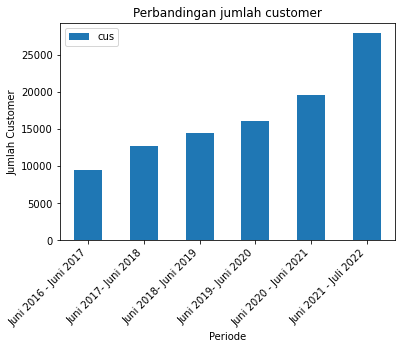

In [37]:
no_of_cust = pd.DataFrame({'cus' : [(data_16_17['customer_id'].count()), 
                                    (data_17_18['customer_id'].count()),
                                   (data_18_19['customer_id'].count()),
                                   (data_19_20['customer_id'].count()),
                                   (data_20_21['customer_id'].count()),
                                   (data_21_22['customer_id'].count())]}, 
                                    index = ["Juni 2016 - Juni 2017", 
                                             "Juni 2017- Juni 2018", 
                                             "Juni 2018- Juni 2019",
                                             "Juni 2019- Juni 2020",
                                             "Juni 2020 - Juni 2021",
                                            "Juni 2021 - Juli 2022"])
no_of_cust.plot(kind='bar')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Periode')
plt.ylabel("Jumlah Customer")
plt.title("Perbandingan jumlah customer")
plt.show()

**Insight**

Dapat dilihat pada graph di atas bahwa terjadi peningkatan jumlah customer yang terdaftar setiap tahunnya

### Bagaimana perbandingan customer berdasarkan province pada periode Juni 2016-Juni 2017?

In [38]:
prov_dist_16_17 = data_16_17.groupby(data_16_17["home_location"])[["customer_id"]].count().sort_values("customer_id", ascending=False)

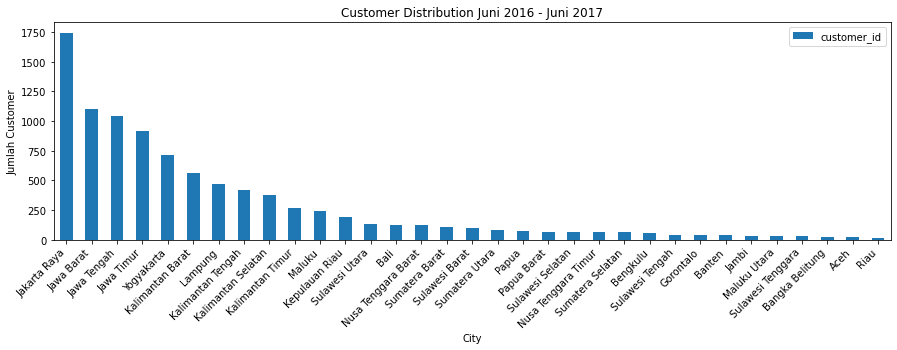

In [39]:
# 10 kota dengan customer terbanyak pada periode Juni 2016 hingga Juni 2017 
prov_dist_16_17.plot(kind= "bar", figsize=(15,4))
plt.xticks(rotation=45, ha='right')
plt.xlabel('City')
plt.ylabel("Jumlah Customer")
plt.title("Customer Distribution Juni 2016 - Juni 2017")
plt.show()

### Bagaimana perbandingan customer berdasarkan province pada periode Juni 2017-Juni 2018?

In [40]:
prov_dist_17_18 = data_17_18.groupby(data_17_18["home_location"])[["customer_id"]].count().sort_values("customer_id", ascending=False)

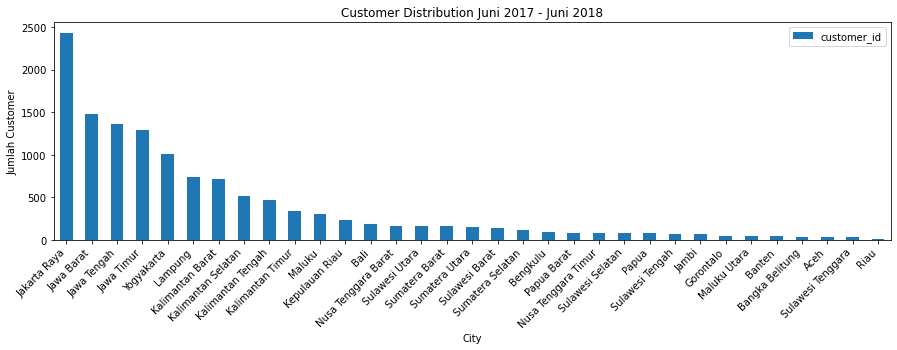

In [41]:
# 10 kota dengan customer terbanyak pada periode Juni 2017 hingga Juni 2018 
prov_dist_17_18.plot(kind= "bar", figsize=(15,4))
plt.xticks(rotation=45, ha='right')
plt.xlabel('City')
plt.ylabel("Jumlah Customer")
plt.title("Customer Distribution Juni 2017 - Juni 2018")
plt.show()

### Bagaimana perbandingan customer berdasarkan province pada periode Juni 2018-Juni 2019?

In [42]:
prov_dist_18_19 = data_18_19.groupby(data_18_19["home_location"])[["customer_id"]].count().sort_values("customer_id", ascending=False)

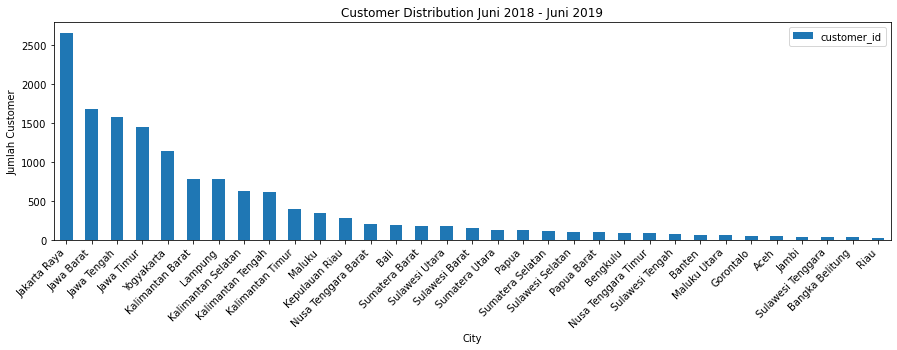

In [43]:
# 10 kota dengan customer terbanyak pada periode Juni 2018 hingga Juni 2019 
prov_dist_18_19.plot(kind= "bar", figsize=(15,4))
plt.xticks(rotation=45, ha='right')
plt.xlabel('City')
plt.ylabel("Jumlah Customer")
plt.title("Customer Distribution Juni 2018 - Juni 2019")
plt.show()

### Bagaimana perbandingan customer berdasarkan province pada periode Juni 2019-Juni 2020?

In [44]:
prov_dist_19_20 = data_19_20.groupby(data_19_20["home_location"])[["customer_id"]].count().sort_values("customer_id", ascending=False)

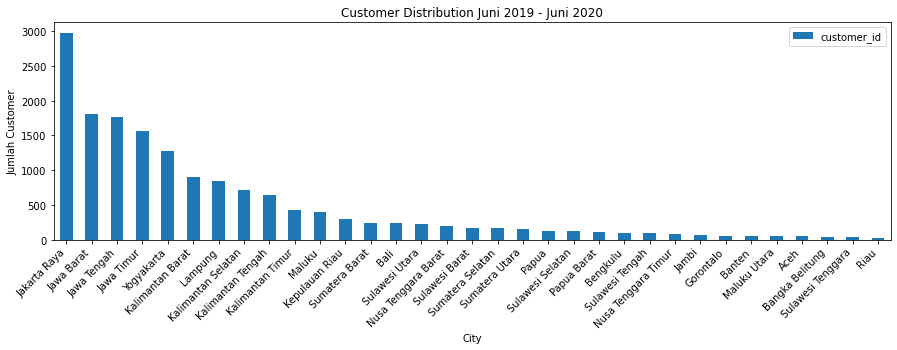

In [45]:
# 10 kota dengan customer terbanyak pada periode Juni 2019 hingga Juni 2020 
prov_dist_19_20.plot(kind= "bar", figsize=(15,4))
plt.xticks(rotation=45, ha='right')
plt.xlabel('City')
plt.ylabel("Jumlah Customer")
plt.title("Customer Distribution Juni 2019 - Juni 2020")
plt.show()

### Bagaimana perbandingan customer berdasarkan province pada periode Juni 2020-Juni 2021?

In [46]:
prov_dist_20_21 = data_20_21.groupby(data_20_21["home_location"])[["customer_id"]].count().sort_values("customer_id", ascending=False)

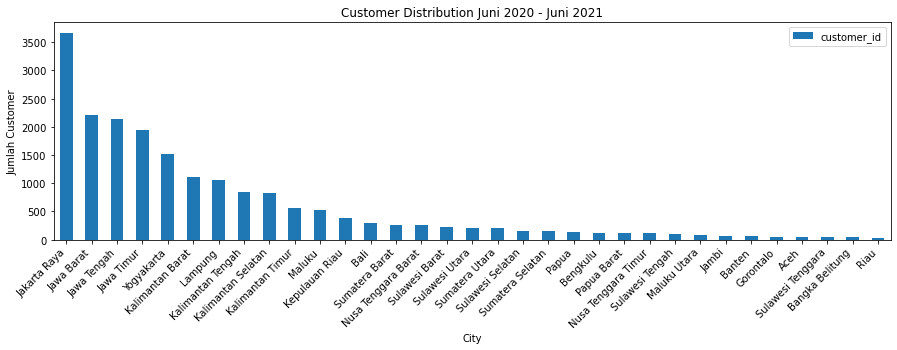

In [47]:
# 10 kota dengan customer terbanyak pada periode Juni 2020 hingga Juni 2021
prov_dist_20_21.plot(kind= "bar", figsize=(15,4))
plt.xticks(rotation=45, ha='right')
plt.xlabel('City')
plt.ylabel("Jumlah Customer")
plt.title("Customer Distribution Juni 2020 - Juni 2021")
plt.show()

### Bagaimana perbandingan customer berdasarkan province pada periode Juni 2021-Juli 2022?

In [48]:
prov_dist_21_22 = data_21_22.groupby(data_21_22["home_location"])[["customer_id"]].count().sort_values("customer_id", ascending=False)

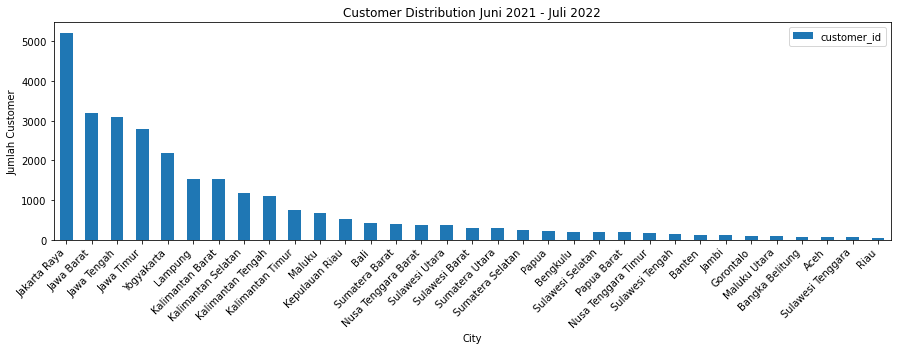

In [49]:
# 10 kota dengan customer terbanyak pada periode Juni 2021 hingga Juli 2022
prov_dist_21_22.plot(kind= "bar", figsize=(15,4))
plt.xticks(rotation=45, ha='right')
plt.xlabel('City')
plt.ylabel("Jumlah Customer")
plt.title("Customer Distribution Juni 2021 - Juli 2022")
plt.show()

### Bagaimana jumlah customer yang mendaftar berdasarkan bulan?

In [50]:
daftar_bymonth = df_customer.groupby(df_customer["first_join_date"].dt.month)["customer_id"].count()
daftar_bymonth

first_join_date
1      8100
2      7429
3      7773
4      7457
5      7915
6      7504
7     14716
8      8293
9      7629
10     8009
11     7533
12     7642
Name: customer_id, dtype: int64

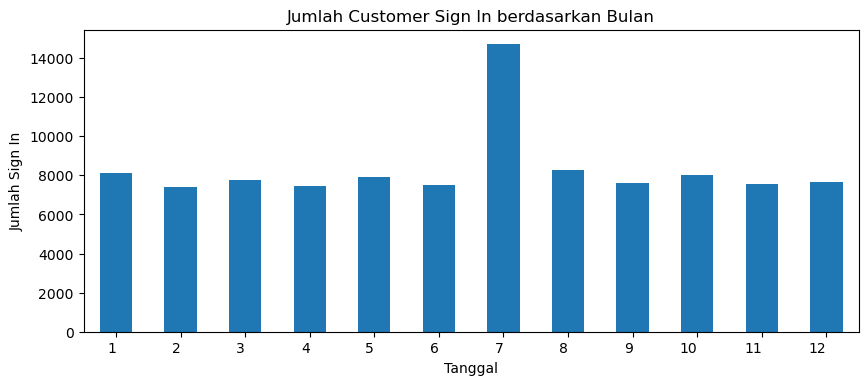

In [51]:
plt.figure(figsize=(10,4), dpi=100)
daftar_bymonth.plot(kind="bar")
plt.xticks(rotation=0,ha='right')
plt.xlabel('Tanggal')
plt.ylabel("Jumlah Sign In")
plt.title("Jumlah Customer Sign In berdasarkan Bulan")
plt.show()

### Bagaimana jumlah customer yang mendaftar berdasarkan bulan?

In [52]:
daftar_byday = df_customer.groupby(df_customer["first_join_date"].dt.day)["customer_id"].count()
daftar_byday

first_join_date
1     3523
2     3818
3     3723
4     3646
5     3814
6     3402
7     3070
8     3029
9     3221
10    3204
11    3196
12    3169
13    2999
14    3051
15    3114
16    3077
17    3210
18    3142
19    3169
20    3012
21    3059
22    2955
23    3171
24    3261
25    3231
26    3149
27    3092
28    3140
29    3113
30    3622
31    2618
Name: customer_id, dtype: int64

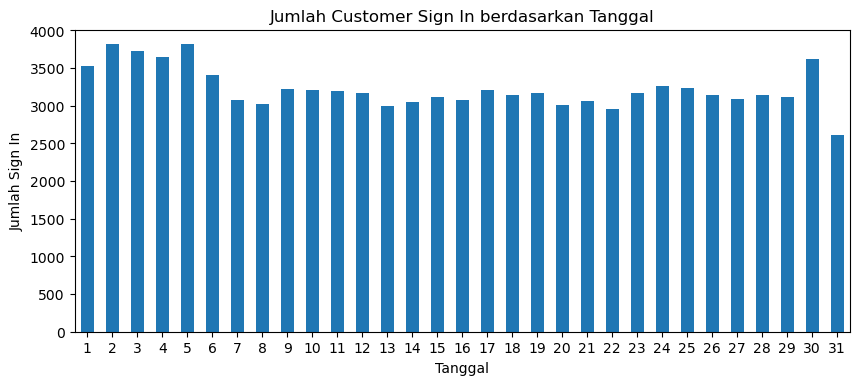

In [53]:
plt.figure(figsize=(10,4), dpi=100)
daftar_byday.plot(kind="bar")
plt.xticks(rotation=0,ha='center')
plt.xlabel('Tanggal')
plt.ylabel("Jumlah Sign In")
plt.title("Jumlah Customer Sign In berdasarkan Tanggal")
plt.show()

### Bagaimana jumlah customer yang mendaftar berdasarkan jam?

In [55]:
daftar_byhour = df_customer.groupby(df_customer["first_join_date"].dt.hour)["customer_id"].count()
daftar_byhour

first_join_date
0    100000
Name: customer_id, dtype: int64

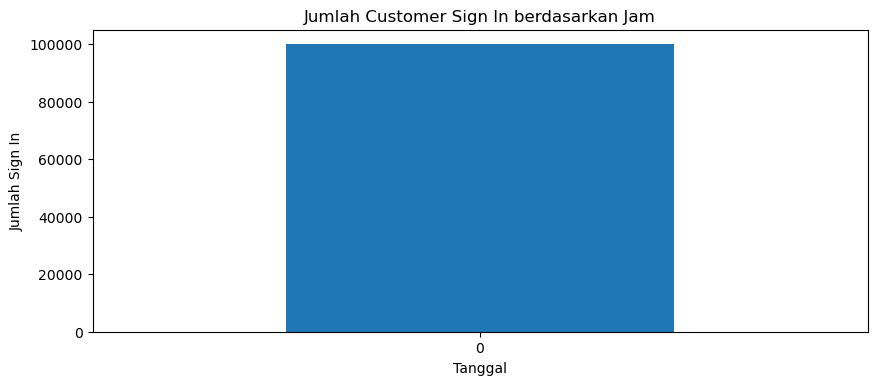

In [56]:
plt.figure(figsize=(10,4), dpi=100)
daftar_byhour.plot(kind="bar")
plt.xticks(rotation=0,ha='center')
plt.xlabel('Tanggal')
plt.ylabel("Jumlah Sign In")
plt.title("Jumlah Customer Sign In berdasarkan Jam")
plt.show()

In [57]:
# merge product dan customer
data = pd.merge(df_customer, df_transactions, on="customer_id", how="inner")

In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 852584 entries, 0 to 852583
Data columns (total 28 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   customer_id             852584 non-null  int64         
 1   first_name              852584 non-null  object        
 2   last_name               852584 non-null  object        
 3   username                852584 non-null  object        
 4   email                   852584 non-null  object        
 5   gender                  852584 non-null  object        
 6   birthdate               852584 non-null  datetime64[ns]
 7   device_type             852584 non-null  object        
 8   device_id               852584 non-null  object        
 9   device_version          852584 non-null  object        
 10  home_location_lat       852584 non-null  float64       
 11  home_location_long      852584 non-null  float64       
 12  home_location           852584

In [59]:
first_class = data[data.total_amount > 10000000]
first_class = first_class.groupby("home_location")[["customer_id"]].count().sort_values("customer_id",ascending=False)

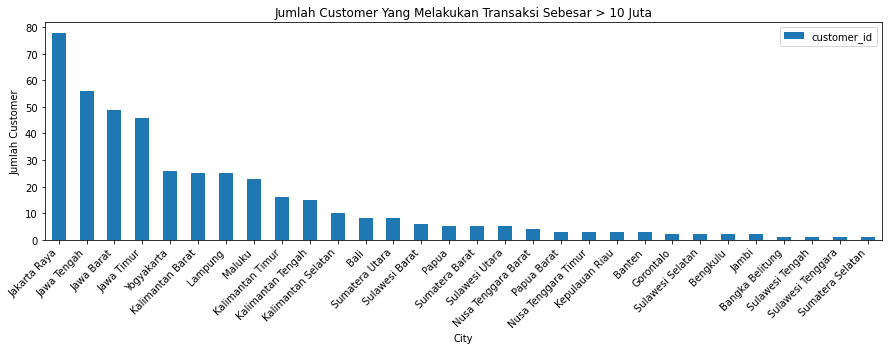

In [60]:
first_class
first_class.plot(kind= "bar", figsize=(15,4))
plt.xticks(rotation=45, ha='right')
plt.xlabel('City')
plt.ylabel("Jumlah Customer")
plt.title("Jumlah Customer Yang Melakukan Transaksi Sebesar > 10 Juta")
plt.show()

In [61]:
mid_class = data[(data.total_amount > 1000000) & (data.total_amount < 10000000)]
mid_class = mid_class.groupby("home_location")[["customer_id"]].count().sort_values("customer_id",ascending=False)

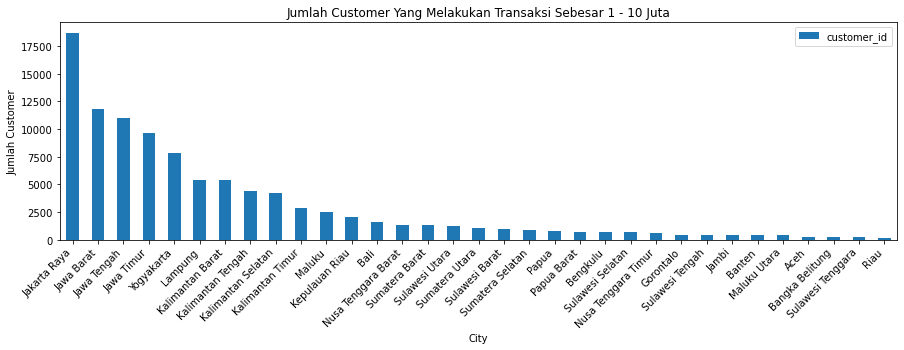

In [62]:
mid_class.plot(kind= "bar", figsize=(15,4))
plt.xticks(rotation=45, ha='right')
plt.xlabel('City')
plt.ylabel("Jumlah Customer")
plt.title("Jumlah Customer Yang Melakukan Transaksi Sebesar 1 - 10 Juta")
plt.show()

In [63]:
low_class = data[(data.total_amount < 1000000)]
low_class = low_class.groupby("home_location")[["customer_id"]].count().sort_values("customer_id",ascending=False)

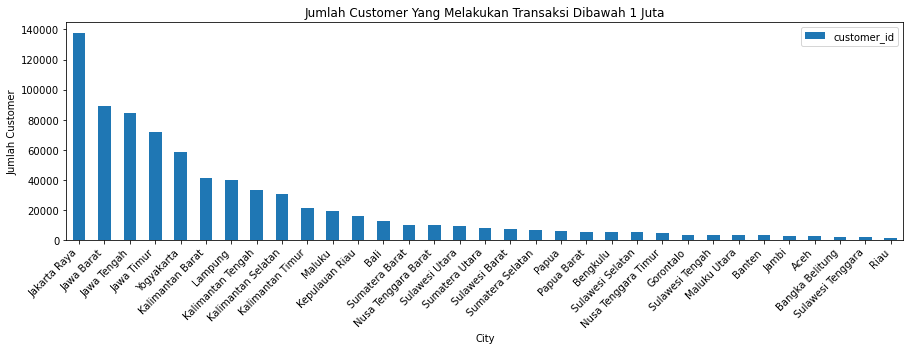

In [64]:
low_class.plot(kind= "bar", figsize=(15,4))
plt.xticks(rotation=45, ha='right')
plt.xlabel('City')
plt.ylabel("Jumlah Customer")
plt.title("Jumlah Customer Yang Melakukan Transaksi Dibawah 1 Juta")
plt.show()

## Product Dataset

In [65]:
df_product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44424 entries, 0 to 44423
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  44424 non-null  int64  
 1   gender              44424 non-null  object 
 2   masterCategory      44424 non-null  object 
 3   subCategory         44424 non-null  object 
 4   articleType         44424 non-null  object 
 5   baseColour          44409 non-null  object 
 6   season              44403 non-null  object 
 7   year                44423 non-null  float64
 8   usage               44107 non-null  object 
 9   productDisplayName  44417 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 3.4+ MB


In [66]:
df_product.head()

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt


In [67]:
df_product.duplicated().sum()

0

In [68]:
df_product.isna().sum()

id                      0
gender                  0
masterCategory          0
subCategory             0
articleType             0
baseColour             15
season                 21
year                    1
usage                 317
productDisplayName      7
dtype: int64

In [69]:
df_product.describe()

,id,year
count,44424.000000,44423.000000
mean,29696.334301,2012.806497
std,17049.490518,2.126480
min,1163.000000,2007.000000
25%,14768.750000,2011.000000
50%,28618.500000,2012.000000
75%,44683.250000,2015.000000
max,60000.000000,2019.000000


In [70]:
df_product.describe(include="O")

,gender,masterCategory,subCategory,articleType,baseColour,season,usage,productDisplayName
count,44424,44424,44424,44424,44409,44403,44107,44417
unique,5,7,45,143,46,4,8,31121
top,Men,Apparel,Topwear,Tshirts,Black,Summer,Casual,Lucera Women Silver Earrings
freq,22147,21397,15402,7067,9728,21472,34406,82


### Data Cleaning
Dapat dilihat dari statistik deskriptif di atas bahwa dataset ini, terdapat tipe data yang tidak sesuai dan memelurkan data cleaning

In [71]:
#Mengubah tipe data kolom year
df_product["year"] = pd.to_numeric(df_product["year"], errors='coerce')

In [72]:
fixed_product = df_product.copy()

In [73]:
fixed_product[fixed_product.articleType == "Jeans"].describe(include="O")

,gender,masterCategory,subCategory,articleType,baseColour,season,usage,productDisplayName
count,609,609,609,609,603,609,609,609
unique,5,1,1,1,11,4,1,299
top,Men,Apparel,Bottomwear,Jeans,Blue,Summer,Casual,Locomotive Men Washed Blue Jeans
freq,332,609,609,609,446,359,609,27


In [74]:
fixed_product[fixed_product.articleType == "Perfume and Body Mist"].describe(include="O")

,gender,masterCategory,subCategory,articleType,baseColour,season,usage,productDisplayName
count,613,613,613,613,605,613,603,608
unique,3,2,2,1,27,1,3,527
top,Men,Personal Care,Fragrance,Perfume and Body Mist,Blue,Spring,Casual,Rasasi Women Pack of 3 Perfumes
freq,331,612,607,613,103,613,601,7


In [75]:
fixed_product[fixed_product.articleType == "Face Moisturisers"].describe(include="O")

,gender,masterCategory,subCategory,articleType,baseColour,season,usage,productDisplayName
count,61,61,61,61,60,61,48,61
unique,1,1,2,1,10,1,1,60
top,Women,Personal Care,Skin,Face Moisturisers,White,Spring,Casual,Lotus Herbals Cocomoist Moisturising Lotion
freq,61,61,54,61,27,61,48,2


In [76]:
fixed_product[fixed_product.baseColour.isna()]

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
6206,11293,Men,Apparel,Bottomwear,Jeans,NaN,Fall,2016.0,Casual,Wrangler Men Blue Texas Jeans
9516,41347,Men,Apparel,Bottomwear,Jeans,NaN,Fall,2016.0,Casual,Wrangler Men Black Texas Jeans
12763,11288,Men,Apparel,Bottomwear,Jeans,NaN,Fall,2016.0,Casual,Wrangler Men Blue Texas Jeans
14291,30991,Women,Personal Care,Fragrance,Perfume and Body Mist,NaN,Spring,2017.0,NaN,NaN
15526,57698,Women,Personal Care,Skin,Face Moisturisers,NaN,Spring,2017.0,Casual,Lotus Herbals Quincenourish Quince Seed Nouris...
15708,41355,Men,Apparel,Bottomwear,Jeans,NaN,Fall,2016.0,Casual,Wrangler Men Blue Millard Jeans
17268,43122,Men,Personal Care,Fragrance,Perfume and Body Mist,NaN,Spring,2017.0,NaN,GUESS Man Eau De Toilette 75 ml
17639,45687,Men,Personal Care,Fragrance,Perfume and Body Mist,NaN,Spring,2017.0,NaN,NaN
20209,11309,Men,Apparel,Bottomwear,Jeans,NaN,Fall,2016.0,Casual,Wrangler Men Blue Floyd Jeans
23484,45698,Women,Personal Care,Fragrance,Perfume and Body Mist,NaN,Spring,2017.0,NaN,NaN


#### Cleaning kolom baseColour

In [77]:
# Mengubah null value dengan mode yang sesuai dengan articleType (Face Moisturisers)
fixed_product.at[15526, "baseColour"] = "White"

In [78]:
# Mengubah null value dengan mode yang sesuai dengan articleType (Jeans)
fixed_product.at[6206, "baseColour"] = "Blue"
fixed_product.at[9516, "baseColour"] = "Blue"
fixed_product.at[12763, "baseColour"] = "Blue"
fixed_product.at[15708, "baseColour"] = "Blue"
fixed_product.at[20209, "baseColour"] = "Blue"
fixed_product.at[34553, "baseColour"] = "Blue"

In [79]:
# Mengubah null value dengan mode yang sesuai dengan articleType (Perfume and Body Mist)
fixed_product.at[14291, "baseColour"] = "Blue"
fixed_product.at[17268, "baseColour"] = "Blue"
fixed_product.at[17639, "baseColour"] = "Blue"
fixed_product.at[23484, "baseColour"] = "Blue"
fixed_product.at[37531, "baseColour"] = "Blue"
fixed_product.at[40675, "baseColour"] = "Blue"
fixed_product.at[43260, "baseColour"] = "Blue"
fixed_product.at[44224, "baseColour"] = "Blue"

In [80]:
fixed_product.isna().sum()

id                      0
gender                  0
masterCategory          0
subCategory             0
articleType             0
baseColour              0
season                 21
year                    1
usage                 317
productDisplayName      7
dtype: int64

#### Cleaning kolom season

In [81]:
fixed_product['season'] = fixed_product['season'].fillna(fixed_product['season'].mode()[0])

In [82]:
fixed_product.isna().sum()

id                      0
gender                  0
masterCategory          0
subCategory             0
articleType             0
baseColour              0
season                  0
year                    1
usage                 317
productDisplayName      7
dtype: int64

#### Cleaning kolom year

In [83]:
fixed_product.loc[21270:21274, :]

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
21270,5411,Women,Footwear,Shoes,Sports Shoes,Black,Fall,2011.0,Sports,Tribord To 100 Basic Lady Ss11
21271,44736,Men,Footwear,Shoes,Formal Shoes,Black,Summer,2012.0,Formal,U.S. Polo Assn. Men Black Formal Shoes
21272,53781,Men,Apparel,Topwear,Tshirts,Blue,Summer,NaN,Sports,Puma Men Blue Sless Round Neck T-shirt
21273,34441,Women,Apparel,Topwear,Tshirts,Yellow,Summer,2012.0,Casual,Myntra Women Peace Love Chocolate Yellow T-shirt
21274,6294,Men,Apparel,Topwear,Tshirts,Green,Summer,2011.0,Casual,UCB Men's Super Star Print Green T-shirt


In [84]:
#Mengubah missing value pada kolom year dengan mode
fixed_product['year'] = fixed_product['year'].fillna(fixed_product['year'].mode()[0])

#### Cleaning kolom productDisplayName

In [85]:
fixed_product[fixed_product.productDisplayName.isna()]

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
3677,42878,Women,Accessories,Bags,Clutches,Maroon,Summer,2012.0,Casual,NaN
14291,30991,Women,Personal Care,Fragrance,Perfume and Body Mist,Blue,Spring,2017.0,NaN,NaN
17639,45687,Men,Personal Care,Fragrance,Perfume and Body Mist,Blue,Spring,2017.0,NaN,NaN
22089,42863,Women,Accessories,Bags,Clutches,Brown,Summer,2012.0,Casual,NaN
23484,45698,Women,Personal Care,Fragrance,Perfume and Body Mist,Blue,Spring,2017.0,NaN,NaN
37531,30992,Men,Personal Care,Fragrance,Perfume and Body Mist,Blue,Spring,2017.0,NaN,NaN
40675,43119,Men,Personal Care,Fragrance,Perfume and Body Mist,Blue,Spring,2017.0,NaN,NaN


In [86]:
fixed_product[fixed_product.articleType == "Perfume and Body Mist"].describe(include="O")

,gender,masterCategory,subCategory,articleType,baseColour,season,usage,productDisplayName
count,613,613,613,613,613,613,603,608
unique,3,2,2,1,27,1,3,527
top,Men,Personal Care,Fragrance,Perfume and Body Mist,Blue,Spring,Casual,Rasasi Women Pack of 3 Perfumes
freq,331,612,607,613,111,613,601,7


In [87]:
fixed_product[(fixed_product.articleType == "Clutches") & (fixed_product.baseColour == "Maroon")].describe(include="O")

,gender,masterCategory,subCategory,articleType,baseColour,season,usage,productDisplayName
count,12,12,12,12,12,12,12,11
unique,1,1,1,1,1,2,1,8
top,Women,Accessories,Bags,Clutches,Maroon,Summer,Casual,Lino Perros Women Maroon Clutch
freq,12,12,12,12,12,9,12,3


In [88]:
fixed_product[(fixed_product.articleType == "Clutches") & (fixed_product.baseColour == "Brown")].describe(include="O")

,gender,masterCategory,subCategory,articleType,baseColour,season,usage,productDisplayName
count,17,17,17,17,17,17,17,16
unique,1,1,1,1,1,3,1,13
top,Women,Accessories,Bags,Clutches,Brown,Summer,Casual,Rocia Women Brown Clutch
freq,17,17,17,17,17,14,17,3


In [89]:
# Mengubah null value dengan mode yang sesuai dengan articleType (Perfume and Body Mist) dan baseColour
fixed_product.at[3677, "productDisplayName"] = "Lino Perros Women Maroon Clutch"
fixed_product.at[22089, "productDisplayName"] = "Rocia Women Brown Clutch"

In [90]:
fixed_product[fixed_product.articleType == "Perfume and Body Mist"].describe(include="O")

,gender,masterCategory,subCategory,articleType,baseColour,season,usage,productDisplayName
count,613,613,613,613,613,613,603,608
unique,3,2,2,1,27,1,3,527
top,Men,Personal Care,Fragrance,Perfume and Body Mist,Blue,Spring,Casual,Rasasi Women Pack of 3 Perfumes
freq,331,612,607,613,111,613,601,7


In [91]:
#Mengubah missing value pada kolom productDisplayName dengan mode
fixed_product['productDisplayName'] = fixed_product['productDisplayName'].fillna(fixed_product['productDisplayName'].mode()[0])

#### Cleaning kolom year

In [92]:
fixed_product.usage.unique()

array(['Casual', 'Ethnic', 'Formal', 'Sports', nan, 'Smart Casual',
       'Travel', 'Party', 'Home'], dtype=object)

In [93]:
fixed_product.usage.describe(include="O")

count      44107
unique         8
top       Casual
freq       34406
Name: usage, dtype: object

In [94]:
fixed_product[fixed_product.usage.isna()]

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
87,56489,Women,Personal Care,Nails,Nail Polish,Bronze,Spring,2017.0,NaN,Streetwear Ash Nail Polish # 31
92,52029,Unisex,Apparel,Topwear,Rain Jacket,Coffee Brown,Summer,2012.0,NaN,Just Natural Unisex Charcoal Rain Jacket
292,55001,Women,Personal Care,Lips,Lipstick,Pink,Spring,2017.0,NaN,Lakme Absolute Lip Last Day Kiss Lip Colour
479,57563,Women,Personal Care,Lips,Lipstick,Brown,Spring,2017.0,NaN,Lotus Herbals Pure Colours Nutty Brown Lipstic...
511,55006,Women,Personal Care,Lips,Lip Gloss,Copper,Spring,2017.0,NaN,Lakme Sheer Satin Lip Gloss 51
...,...,...,...,...,...,...,...,...,...,...
43633,56605,Women,Personal Care,Makeup,Kajal and Eyeliner,Black,Spring,2017.0,NaN,Streetwear Black Eye Liner 01
44079,57715,Women,Personal Care,Lips,Lip Gloss,Red,Spring,2017.0,NaN,Lotus Herbals Seduction Sappy Watermelon Lip G...
44224,43120,Men,Personal Care,Fragrance,Perfume and Body Mist,Blue,Spring,2017.0,NaN,GUESS by Marciano Men Eau De Toilette 50 ml
44227,55045,Women,Personal Care,Lips,Lipstick,Purple,Spring,2017.0,NaN,Lakme Enrich Satins Lipstick 461


In [95]:
#Mengubah missing value pada kolom usage dengan mode
fixed_product['usage'] = fixed_product['usage'].fillna(fixed_product['usage'].mode()[0])

In [96]:
fixed_product.isna().sum()

id                    0
gender                0
masterCategory        0
subCategory           0
articleType           0
baseColour            0
season                0
year                  0
usage                 0
productDisplayName    0
dtype: int64